## 1. Machine Learning

## 1.1 Preparazione del notebook

Premere il tasto *play* della cella seguente per installare alcune librerie necessarie alla visualizzazione delle mappe. Terminata l'installazione, riavviare il runtime (dalla barra degli strumenti *Runtime* -> *Riavvia runtime*) e proseguire con le celle successive.

In [ ]:
! apt-get install libgeos-3.5.0
! apt-get install libgeos-dev
! pip install https://github.com/matplotlib/basemap/archive/master.zip

Premere il tasto *play* della cella seguente per importare i dataset dalla repository di GitHub.

In [ ]:
! git clone https://github.com/vitoreno/StelleDataset.git
! unzip /content/StelleDataset/data.zip

Premere il tasto *play* della cella seguente per importare le librerie necessarie all'esecuzione del notebook.

In [2]:
%load_ext google.colab.data_table
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import sys
from datetime import datetime
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

## 1.2 SVM

Si intende predire i valori di umidità del suolo sulla costa a partire dalle temperature del mare nei punti più vicini, tramite SVM.

Selezionare le regioni sulle quali effettuare il training, e quelle sulle quali effettuare la valutazione in una determinata data. Le date possibili vanno dal 2016-01-01 al 2016-12-31. Infine premere il tasto *play* per avviare l'esecuzione della cella.

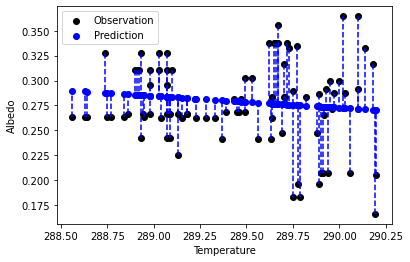

Mean Squared Error:  0.001761308766424872


,Observed albedo,Predicted albedo,Error
0,0.281488,0.281990,0.000502
1,0.281488,0.279431,0.002058
2,0.281488,0.278946,0.002542
3,0.283892,0.276077,0.007815
4,0.283892,0.274798,0.009094
...,...,...,...
85,0.311071,0.284310,0.026762
86,0.327889,0.283822,0.044067
87,0.295266,0.284918,0.010348
88,0.327889,0.285526,0.042363


In [3]:
#@markdown Training
train_Adriatic = True #@param {type:"boolean"}
train_Ionian = True #@param {type:"boolean"}
train_Tyrrhenian = False #@param {type:"boolean"}
train_Labrador = False #@param {type:"boolean"}
train_Red = False #@param {type:"boolean"}
#@markdown Test
date_str = '2016-01-01' #@param {type:"date"}
test_Adriatic = False #@param {type:"boolean"}
test_Ionian = False #@param {type:"boolean"}
test_Tyrrhenian = True #@param {type:"boolean"}
test_Labrador = False #@param {type:"boolean"}
test_Red = False #@param {type:"boolean"}

train_list = []
test_list = []
if train_Adriatic:
  train_list = train_list + ["Adriatic"]
if train_Ionian:
  train_list = train_list + ["Ionian"]
if train_Tyrrhenian:
  train_list = train_list + ["Tyrrhenian"]
if train_Labrador:
  train_list = train_list + ["Labrador"]
if test_Red:
  test_list = test_list + ["Red"]
if test_Adriatic:
  test_list = test_list + ["Adriatic"]
if test_Ionian:
  test_list = test_list + ["Ionian"]
if test_Tyrrhenian:
  test_list = test_list + ["Tyrrhenian"]
if test_Labrador:
  test_list = test_list + ["Labrador"]
if test_Red:
  test_list = test_list + ["Red"]

current_date = datetime.strptime(date_str + " 12:00:00", '%Y-%m-%d %H:%M:%S')

if (current_date < datetime.strptime("2016-01-01 12:00:00", '%Y-%m-%d %H:%M:%S')) | (current_date > datetime.strptime("2016-12-31 12:00:00", '%Y-%m-%d %H:%M:%S')):
  sys.exit("Data non valida. Inserire data compresa fra 2016-01-01 e 2016-12-31")

data = pd.read_csv("/content/soil_moisture_2016.csv")
data.time = pd.to_datetime(data.time)
train_data = data.loc[data['sea'].isin(train_list)]
test_data = data.loc[((data['sea'].isin(test_list)) & (data['time'] == current_date))]

train_sst = train_data.sst.to_numpy().reshape(-1, 1)
train_sm = train_data.sm.to_numpy()
test_sst = test_data.sst.to_numpy().reshape(-1, 1)
test_sm = test_data.sm.to_numpy()

regression = svm.SVR()

regression.fit(train_sst,train_sm)

prediction = regression.predict(test_sst)

for i in range(test_sm.shape[0]):
  plt.plot([test_sst[i],test_sst[i]], [test_sm[i],prediction[i]], '--b')
plt.scatter(test_sst, test_sm, color='black', label='Observation')
plt.scatter(test_sst, prediction, color='blue', label='Prediction')
plt.xlabel('Temperature')
plt.ylabel('Albedo')
plt.legend()
plt.show()

results = pd.DataFrame({"Observed albedo": test_sm, "Predicted albedo": prediction, "Error": np.abs(test_sm - prediction)})
print("Mean Squared Error: ", mean_squared_error(test_sm, prediction))
results

## 1.3 Random Forest

Si intende predire i valori di umidità del suolo sulla costa a partire dalle temperature del mare nei punti più vicini, tramite Random Forest.

Selezionare le regioni sulle quali effettuare il training, e quelle sulle quali effettuare la valutazione in una determinata data. Le date possibili vanno dal 2016-01-01 al 2016-12-31. Infine premere il tasto *play* per avviare l'esecuzione della cella.

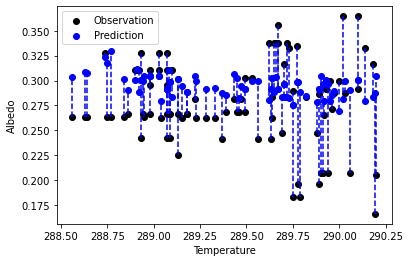

Mean Squared Error:  0.002199364914604516


,Observed albedo,Predicted albedo,Error
0,0.281488,0.304269,0.022781
1,0.281488,0.306277,0.024789
2,0.281488,0.294101,0.012612
3,0.283892,0.283747,0.000145
4,0.283892,0.284980,0.001088
...,...,...,...
85,0.311071,0.304540,0.006531
86,0.327889,0.292012,0.035876
87,0.295266,0.304138,0.008872
88,0.327889,0.300662,0.027226


In [4]:
#@markdown Training
train_Adriatic = True #@param {type:"boolean"}
train_Ionian = True #@param {type:"boolean"}
train_Tyrrhenian = False #@param {type:"boolean"}
train_Labrador = False #@param {type:"boolean"}
train_Red = False #@param {type:"boolean"}
#@markdown Test
date_str = '2016-01-01' #@param {type:"date"}
test_Adriatic = False #@param {type:"boolean"}
test_Ionian = False #@param {type:"boolean"}
test_Tyrrhenian = True #@param {type:"boolean"}
test_Labrador = False #@param {type:"boolean"}
test_Red = False #@param {type:"boolean"}

train_list = []
test_list = []
if train_Adriatic:
  train_list = train_list + ["Adriatic"]
if train_Ionian:
  train_list = train_list + ["Ionian"]
if train_Tyrrhenian:
  train_list = train_list + ["Tyrrhenian"]
if train_Labrador:
  train_list = train_list + ["Labrador"]
if test_Red:
  test_list = test_list + ["Red"]
if test_Adriatic:
  test_list = test_list + ["Adriatic"]
if test_Ionian:
  test_list = test_list + ["Ionian"]
if test_Tyrrhenian:
  test_list = test_list + ["Tyrrhenian"]
if test_Labrador:
  test_list = test_list + ["Labrador"]
if test_Red:
  test_list = test_list + ["Red"]

current_date = datetime.strptime(date_str + " 12:00:00", '%Y-%m-%d %H:%M:%S')

if (current_date < datetime.strptime("2016-01-01 12:00:00", '%Y-%m-%d %H:%M:%S')) | (current_date > datetime.strptime("2016-12-31 12:00:00", '%Y-%m-%d %H:%M:%S')):
  sys.exit("Data non valida. Inserire data compresa fra 2016-01-01 e 2016-12-31")

data = pd.read_csv("/content/soil_moisture_2016.csv")
data.time = pd.to_datetime(data.time)
train_data = data.loc[data['sea'].isin(train_list)]
test_data = data.loc[((data['sea'].isin(test_list)) & (data['time'] == current_date))]

train_sst = train_data.sst.to_numpy().reshape(-1, 1)
train_sm = train_data.sm.to_numpy()
test_sst = test_data.sst.to_numpy().reshape(-1, 1)
test_sm = test_data.sm.to_numpy()

regression = RandomForestRegressor()

regression.fit(train_sst,train_sm)

prediction = regression.predict(test_sst)

for i in range(test_sm.shape[0]):
  plt.plot([test_sst[i],test_sst[i]], [test_sm[i],prediction[i]], '--b')
plt.scatter(test_sst, test_sm, color='black', label='Observation')
plt.scatter(test_sst, prediction, color='blue', label='Prediction')
plt.xlabel('Temperature')
plt.ylabel('Albedo')
plt.legend()
plt.show()

results = pd.DataFrame({"Observed albedo": test_sm, "Predicted albedo": prediction, "Error": np.abs(test_sm - prediction)})
print("Mean Squared Error: ", mean_squared_error(test_sm, prediction))
results

## 1.4 Clustering

Si intende effettuare una classificazione non supervisionata della temperatura della superficie del Mediterraneo, tramite clustering.

Selezionare una data compresa fra 2014-01-01 e 2016-01-01 (nella quale i dati da considerare sono stati registrati), il numero di cluster desiderato e premere il tasto *play*.

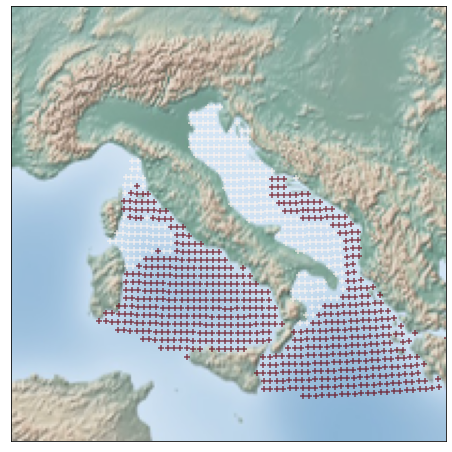

In [5]:
date_str = '2014-01-01' #@param {type:"date"}
n_cluster = 2 #@param {type:"slider", min:2, max:10, step:1}

current_date = datetime.strptime(date_str + " 12:00:00", '%Y-%m-%d %H:%M:%S')

if (current_date < datetime.strptime("2014-01-01 12:00:00", '%Y-%m-%d %H:%M:%S')) | (current_date > datetime.strptime("2016-12-31 12:00:00", '%Y-%m-%d %H:%M:%S')):
  sys.exit("Data non valida. Inserire data compresa fra 2014-01-01 e 2016-12-31")

data = pd.read_csv("/content/mediterranean_surface_temperature_2014_15_16.csv")
data.time = pd.to_datetime(data.time)

current_data = data.loc[data.time == current_date]
lat = current_data.lat.to_numpy()
lon = current_data.lon.to_numpy()
sst = current_data.sst.to_numpy().reshape(-1, 1)

clustering = AgglomerativeClustering(n_clusters = n_cluster).fit(sst)

fig = plt.figure(figsize=(10, 8))
m = Basemap(projection='lcc', resolution='c',
            width=1.5E6, height=1.5E6, 
            lat_0=42, lon_0=14)
m.shadedrelief(scale=0.5)
m.scatter(lon, lat, latlon=True, c=clustering.labels_,
          cmap='Reds', marker ='+', edgecolors='none', alpha=0.7)

## 1.5 K-Means

Si intende effettuare una classificazione non supervisionata della temperatura della superficie del Mediterraneo, tramite K-Means.

Selezionare una data compresa fra 2014-01-01 e 2016-01-01 (nella quale i dati da considerare sono stati registrati), il valore di *K* desiderato e premere il tasto *play*.

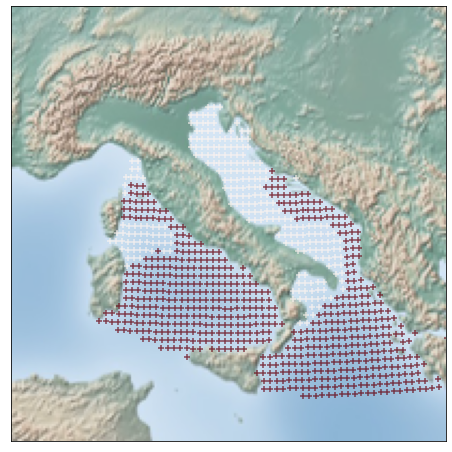

In [6]:
date_str = '2014-01-01' #@param {type:"date"}
n_cluster = 2 #@param {type:"slider", min:2, max:10, step:1}

current_date = datetime.strptime(date_str + " 12:00:00", '%Y-%m-%d %H:%M:%S')

if (current_date < datetime.strptime("2014-01-01 12:00:00", '%Y-%m-%d %H:%M:%S')) | (current_date > datetime.strptime("2016-12-31 12:00:00", '%Y-%m-%d %H:%M:%S')):
  sys.exit("Data non valida. Inserire data compresa fra 2014-01-01 e 2016-12-31")

data = pd.read_csv("/content/mediterranean_surface_temperature_2014_15_16.csv")
data.time = pd.to_datetime(data.time)

current_data = data.loc[data.time == current_date]
lat = current_data.lat.to_numpy()
lon = current_data.lon.to_numpy()
sst = current_data.sst.to_numpy().reshape(-1, 1)

kmeans = KMeans(n_clusters = n_cluster).fit(sst)

fig = plt.figure(figsize=(10, 8))
m = Basemap(projection='lcc', resolution='c',
            width=1.5E6, height=1.5E6, 
            lat_0=42, lon_0=14)
m.shadedrelief(scale=0.5)
m.scatter(lon, lat, latlon=True, c=kmeans.labels_,
          cmap='Reds', marker ='+', edgecolors='none', alpha=0.7)